In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas
from sklearn.cross_validation import train_test_split
import numpy

In [2]:
tweet = pandas.read_csv("C:/c/Rawls/kaggle/twitter/data/Tweets.csv")
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [3]:
# percentage of null values in each row
# (total row number - row number in each column)/total row number 
(len(tweet)-tweet.count())/len(tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [4]:
del tweet['airline_sentiment_gold']
del tweet['negativereason_gold']
del tweet['tweet_coord']

In [5]:
mood_count = tweet['airline_sentiment'].value_counts()
mood_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

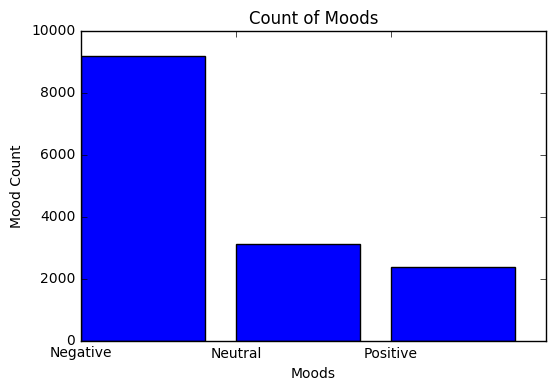

In [6]:
Index = [1,2,3]
plt.bar(Index, mood_count)
plt.xticks(Index, ['Negative', 'Neutral', 'Positive'])
plt.ylabel('Mood Count')
plt.xlabel('Moods')
plt.title('Count of Moods')

In [7]:
tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

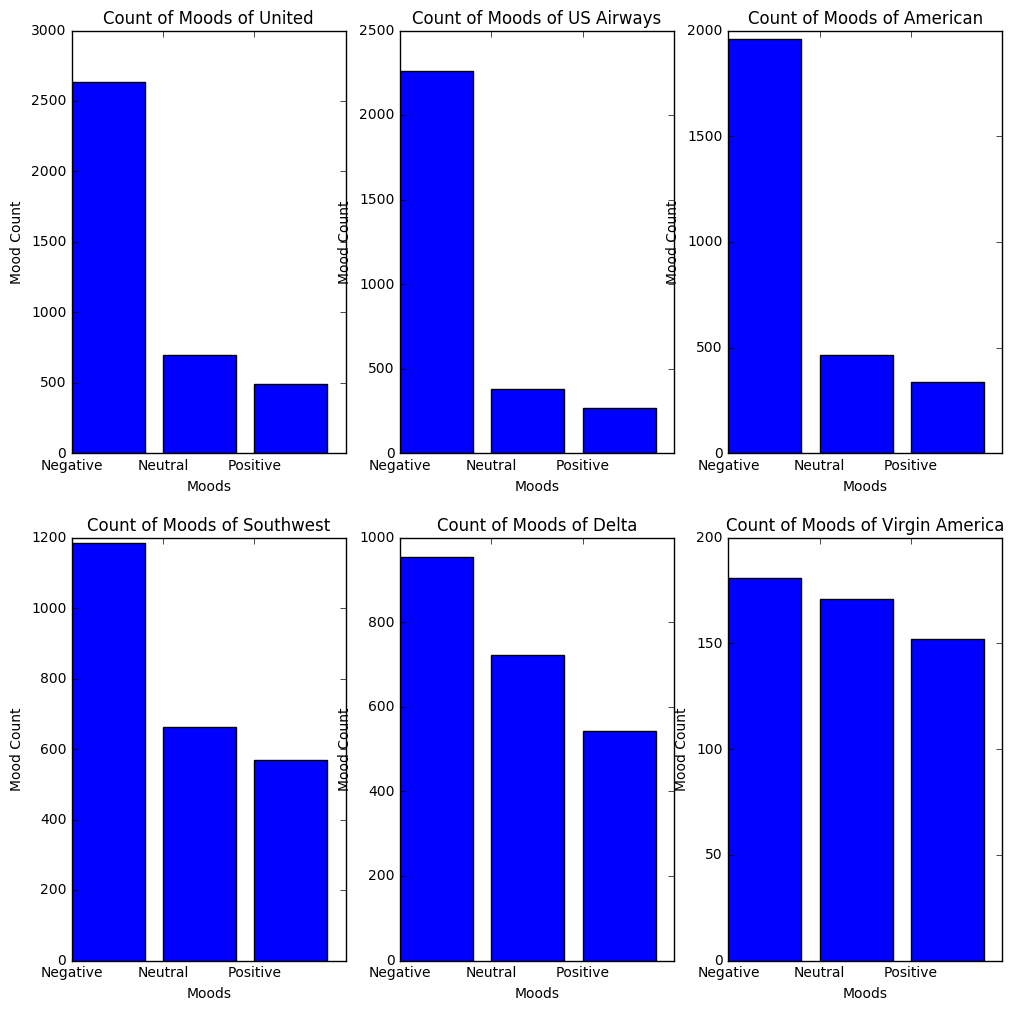

In [8]:
def plot_sub_sentiment(Airline):
    df = tweet[tweet['airline'] == Airline]
    count = df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index, count)
    plt.xticks(Index, ['Negative', 'Neutral', 'Positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Moods')
    plt.title('Count of Moods of ' +Airline)
plt.figure(1,figsize=(12,12))
plt.subplot(231)
plot_sub_sentiment('United')
plt.subplot(232)
plot_sub_sentiment('US Airways')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

In [9]:
NR_Count = dict(tweet['negativereason'].value_counts(sort=False))

NR_Count

{'Bad Flight': 580,
 "Can't Tell": 1190,
 'Cancelled Flight': 847,
 'Customer Service Issue': 2910,
 'Damaged Luggage': 74,
 'Flight Attendant Complaints': 481,
 'Flight Booking Problems': 529,
 'Late Flight': 1665,
 'Lost Luggage': 724,
 'longlines': 178}

In [10]:
def NR_Count(Airline):
    if Airline=='All':
        df=tweet
    else:
        df=tweet[tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [11]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

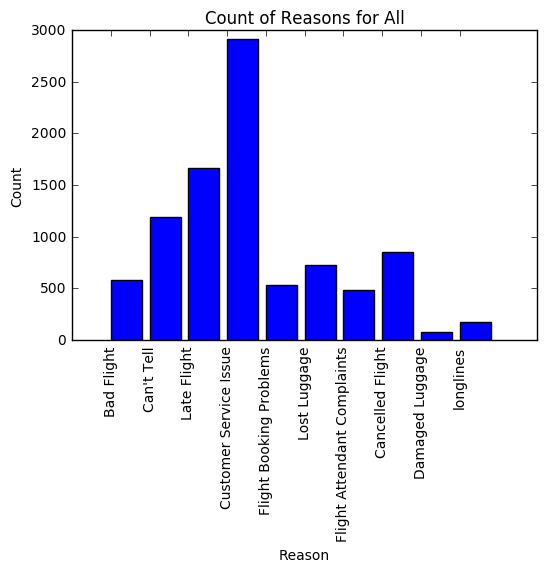

In [12]:
plot_reason('All')

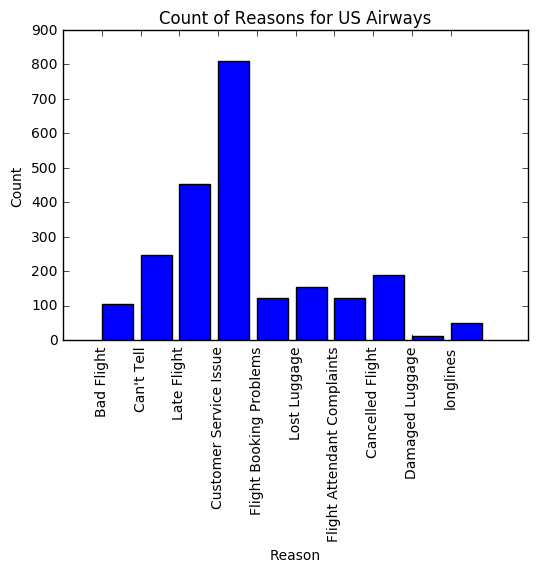

In [13]:
plot_reason('US Airways')

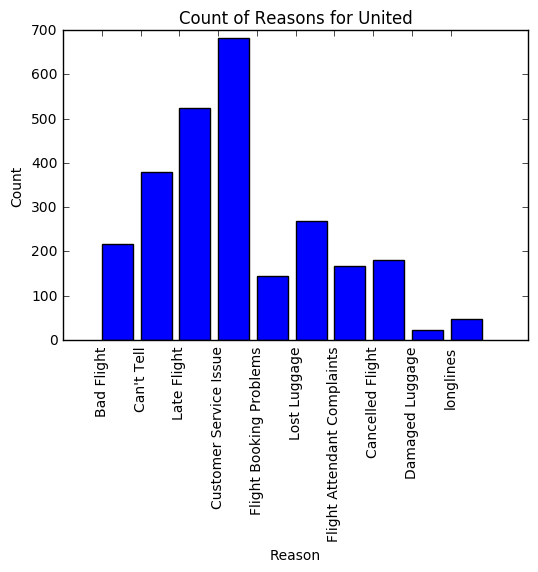

In [14]:
plot_reason('United')

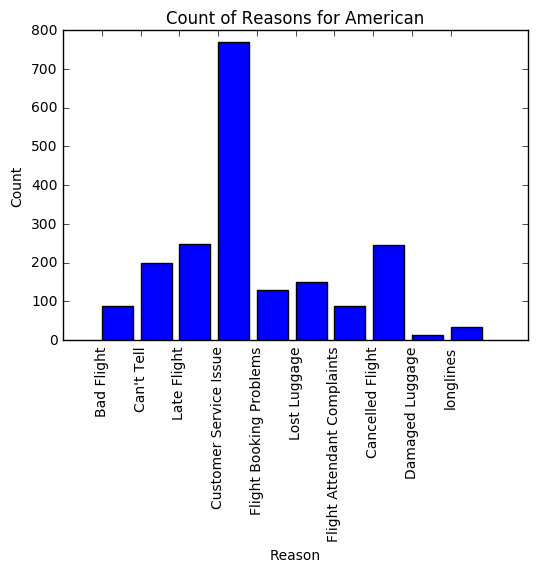

In [15]:
plot_reason('American')

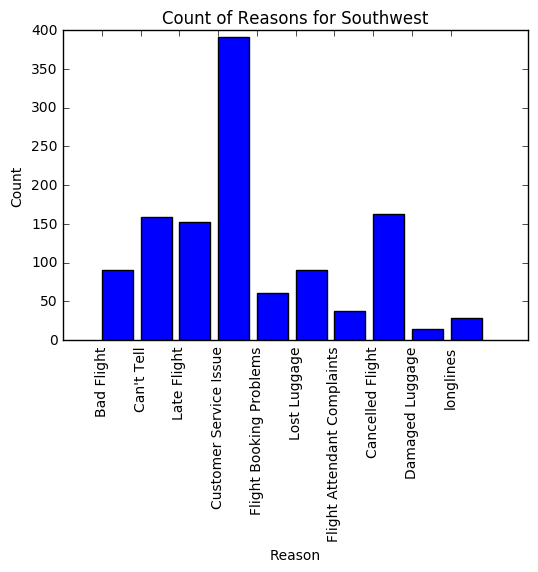

In [16]:
plot_reason('Southwest')

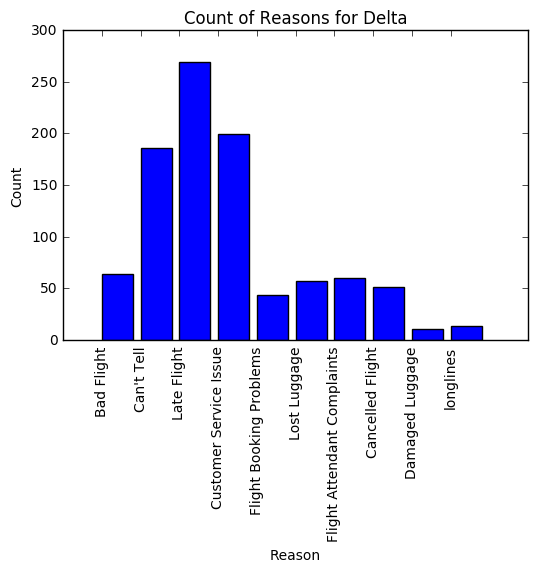

In [17]:
plot_reason('Delta')

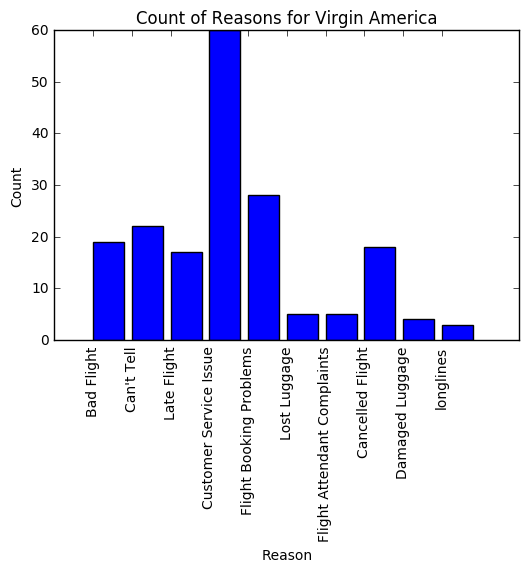

In [18]:
plot_reason('Virgin America')

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
df = tweet[tweet['airline_sentiment'] == 'negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                        if 'http' not in word
                         and not word.startswith('@')
                         and word != 'RT'
                        ])

In [21]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

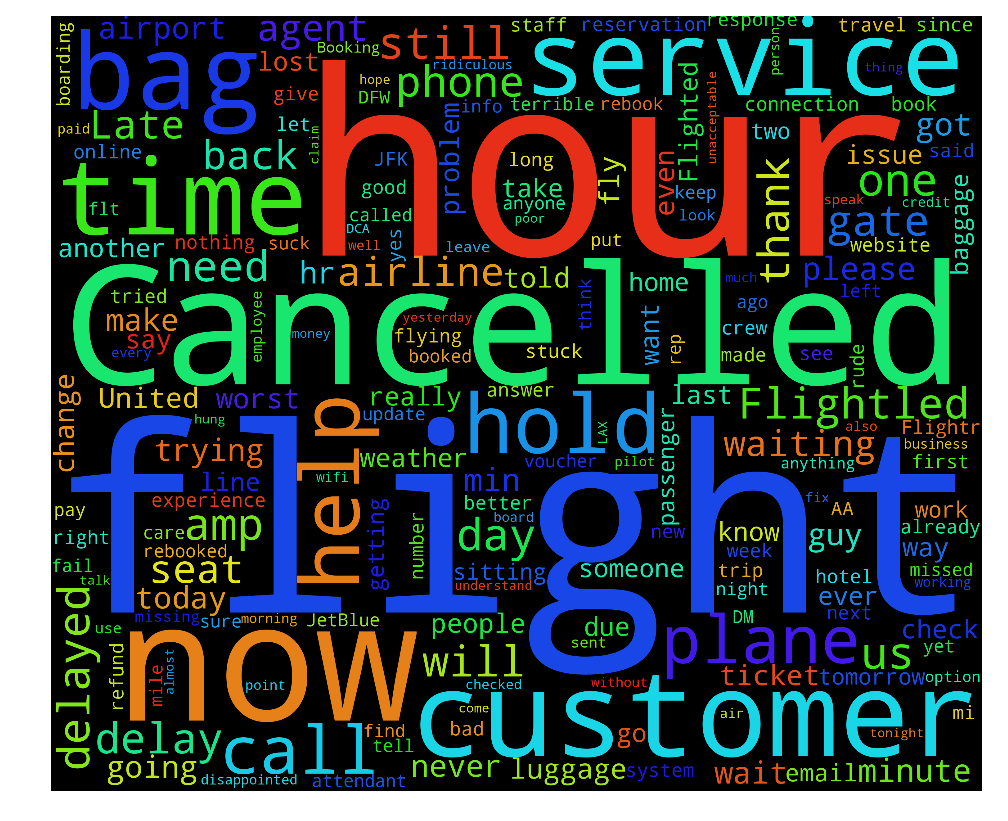

In [22]:
plt.figure(1, figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tmustafa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub('[^a-zA-Z]',' ', raw_tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    return(' '.join(meaningful_words))

In [25]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ", raw_tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(len(meaningful_words))

In [26]:
tweet['sentiment']=tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [28]:
tweet['clean_tweet']=tweet['text'].apply(lambda x: tweet_to_words(x))
tweet['Tweet_length']=tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(tweet,test_size=0.2,random_state=42)

In [30]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features = v.transform(test_clean_tweet)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [34]:
Classifiers = [
    LogisticRegression(C=0.000000001, solver='liblinear', max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel='rbf', C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()
]

In [35]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()
Accuracy = []
Model = []
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features, train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features, train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred, test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of ' +classifier.__class__.__name__ + 'is ' + str(accuracy))

Accuracy of LogisticRegressionis 0.645150273224
Accuracy of KNeighborsClassifieris 0.589139344262
Accuracy of SVCis 0.645150273224
Accuracy of DecisionTreeClassifieris 0.758538251366
Accuracy of RandomForestClassifieris 0.813524590164
Accuracy of AdaBoostClassifieris 0.785519125683
Accuracy of GaussianNBis 0.572404371585


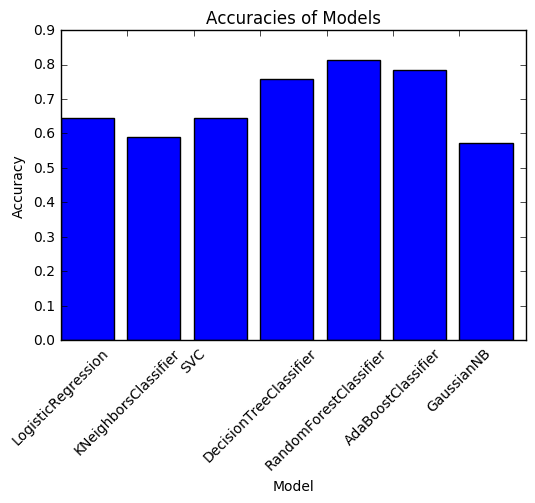

In [36]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation = 45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')